In [6]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd 
from scipy.stats import ttest_rel
from matplotlib import pyplot as plt

plt.style.use("ggplot")

# Research description
------  

> Our goal is to analyze the Stroop effect, a classic result of experimental psychology, by using descriptive statistics and a statistical test.  

## Variable  
  
- ### Independent Variable  
&emsp; Stroop effect.whether the words shown are congruent with the ink colors or if they are incongruent with ink colors  
    
    
- ### Dependent Variable  
&emsp; the amount of time it takes to name the color of the inks in which the words are displayed  
  
   
## Hypothesis  
&emsp;$H_0:\mu_1=\mu_2$    
  
&emsp;$H_A:\mu_1<\mu_2 $  
  
&emsp;$\alpha<0.05$  
  
$\mu_1、\mu_2$ is the population mean, which we use the sample mean to inference that.  
  
I use one-tail t-test to test whether there's an effect called Stroop effect between the two condition groups.  
As the rule of thumb of z-test:  
- know the true population's standard deviation $\sigma$  
- sample size > 30  
  
The test is a dependent sample test because the we use the same person in the experiment design.

# Exploration Data Analysis

In [3]:
df = pd.read_csv("stroopdata.csv")
print("-"*32,"sample data","-"*32)
print(df.head())
print("-"*32,"parameter","-"*32)
print(df.describe())
print("-"*64)

print(" In the experient group, the performance is more worse than the treated group.\n \
So there should something happened by the scoop effect.")

-------------------------------- sample data --------------------------------
   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
-------------------------------- parameter --------------------------------
       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
----------------------------------------------------------------
 In the experient group, the performance is more worse than the treated group.
 So there should something happened by the scoop effect.


I plot the **histgram** and **kde**`(kernel density estimation)` curve.  
From the following graph, we can see there's really a difference between two groups,
the Incongruent group takes more time than the Congruent ones.
It takes about 15s average for the Congruent group while the Incongruent group almost takes 20s average.  
The distribution is nearly a bell curve.

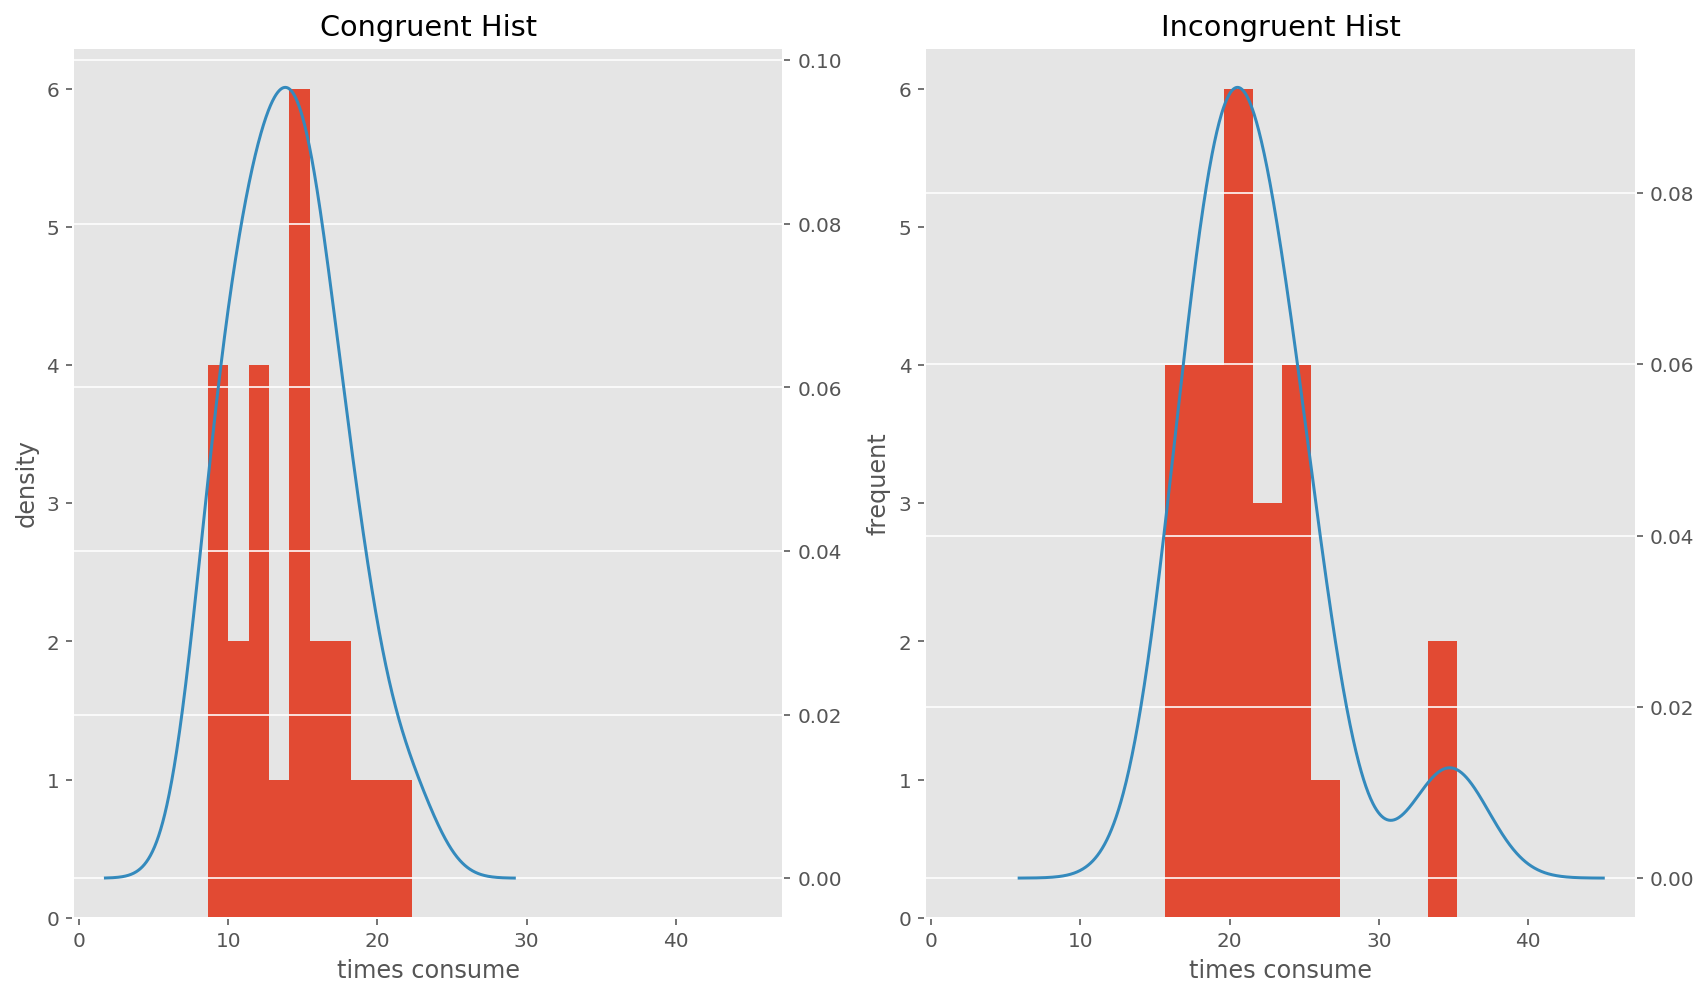

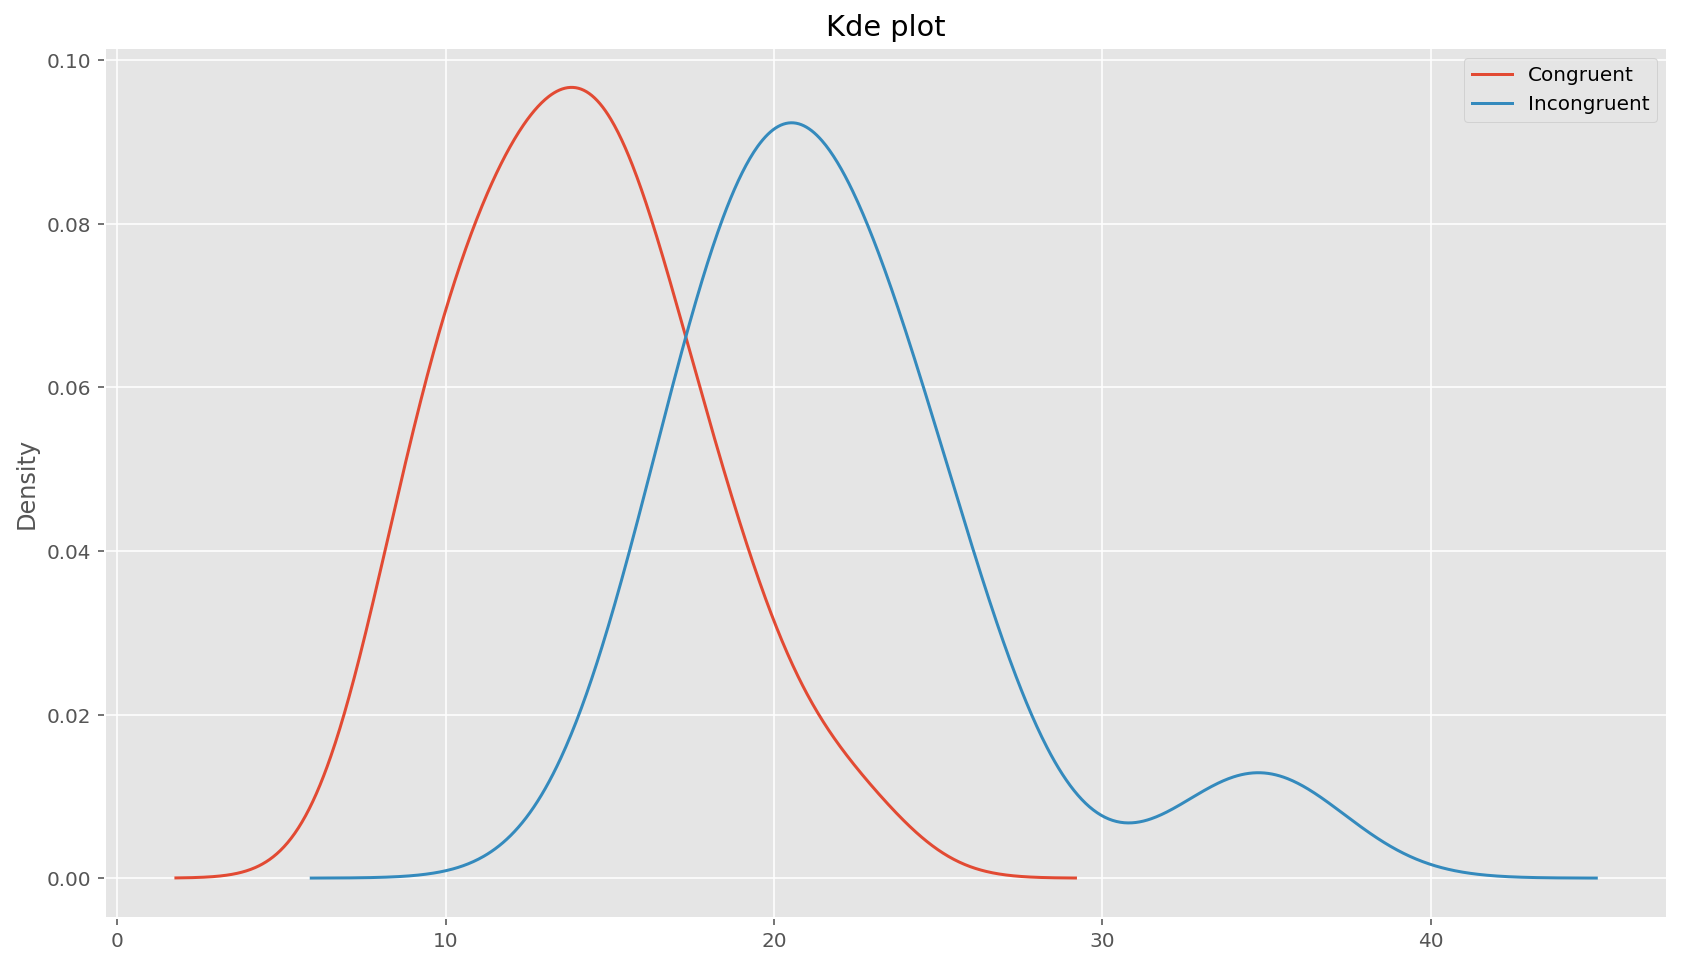

In [7]:
fig,axes = plt.subplots(1,2,figsize=(14,8),sharex=True)
df["Congruent"].plot.hist(title="Congruent Hist",ax=axes[0])
df["Congruent"].plot.kde(title="Congruent Hist",ax=axes[0],secondary_y=True)
df["Incongruent"].plot.hist(title="Incongruent Hist",ax=axes[1])
df["Incongruent"].plot.kde(title="Incongruent Hist",ax=axes[1],secondary_y=True)
axes[0].set_xlabel("times consume")
axes[1].set_xlabel("times consume")
axes[0].set_ylabel("frequent")
axes[0].set_ylabel("density")
axes[1].set_ylabel("frequent")



fig,axes_kde = plt.subplots(1,1,figsize=(14,8),sharex=True)
df["Congruent"].plot.kde(title="Kde plot",ax=axes_kde)
df["Incongruent"].plot.kde(ax=axes_kde)
axes_kde.legend(["Congruent","Incongruent"])

In [8]:
ttest_rel(df["Congruent"],df["Incongruent"])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

# Result
---
`ttest_rel` is two-tail t-test, that mean pvalue/2 < alpha.  
  
$T(23) = -8.020706944109957,  p = 4.1030005857111781e-08*2$, one tail.  
  
Because p < $\alpha=0.05$ , so we reject the $H_0$, that's statistical significant.